# Magic the Gathering Data Analysis
## Nicholas Saveas

This analysis does not include sets after 2017.(only Dominaria (DOM))

The source data can be found here: https://mtgjson.com/

In [39]:
import json
from pprint import pprint

data = json.load(open('../AllSets.json'), encoding = "utf8")

## Analyzing set names
I understand that this serves no real purpose and tells me nothing about the game. It just seems like to fun to visualize and play around with this sort of data.

As you can see there are a lot of sets - 220 to be exact.

In [40]:
# Initialize an emtpy list then populate it with the set names
# The top level of the data set from the json file is organized by set names
allSets = []
for i in data:
    allSets.append(i)

print(allSets)

print("The number of sets in an allSets is", len(allSets))

['UST', 'UNH', 'UGL', 'pWOS', 'pWOR', 'pWCQ', 'pSUS', 'pSUM', 'pREL', 'pPRO', 'pPRE', 'pPOD', 'pMPR', 'pMGD', 'pMEI', 'pLPA', 'pLGM', 'pJGP', 'pHHO', 'pWPN', 'pGTW', 'pGRU', 'pGPX', 'pFNM', 'pELP', 'pDRC', 'pCMP', 'pCEL', 'pARL', 'pALP', 'p2HG', 'p15A', 'PD3', 'PD2', 'H09', 'PTK', 'POR', 'PO2', 'PCA', 'PC2', 'HOP', 'VMA', 'MMA', 'MM3', 'MM2', 'MED', 'ME4', 'ME3', 'ME2', 'IMA', 'EMA', 'MPS_AKH', 'MPS', 'EXP', 'E02', 'V17', 'V16', 'V15', 'V14', 'V13', 'V12', 'V11', 'V10', 'V09', 'DRB', 'EVG', 'DDT', 'DDS', 'DDR', 'DDQ', 'DDP', 'DDO', 'DDN', 'DDM', 'DDL', 'DDK', 'DDJ', 'DDI', 'DDH', 'DDG', 'DDF', 'DDE', 'DDD', 'DDC', 'DD3_JVC', 'DD3_GVL', 'DD3_EVG', 'DD3_DVD', 'DD2', 'CNS', 'CN2', 'CMD', 'CMA', 'CM1', 'C17', 'C16', 'C15', 'C14', 'C13', 'CEI', 'CED', 'E01', 'ARC', 'ZEN', 'XLN', 'WWK', 'WTH', 'W17', 'W16', 'VIS', 'VAN', 'USG', 'ULG', 'UDS', 'TSP', 'TSB', 'TPR', 'TOR', 'TMP', 'THS', 'STH', 'SOM', 'SOK', 'SOI', 'SHM', 'SCG', 'S99', 'S00', 'RTR', 'RQS', 'ROE', 'RIX', 'RAV', 'PLS', 'PLC', 'PCY'

## Cleaning the data
The set codes contain a lot of not legal in tournament play.

I want the data to focus on only the legal expansion/core sets and not the introduction, compilation, or core sets. 

Surprisingly, the legal sets make up less than half of the total number of magic sets with set codes.

In [41]:
# Print the set names but clean the data a bit
expansionSets = [x for x in allSets if len(x) == 3]                                # set names longer than 3 characters are special/promo sets
expansionSets = [x for x in expansionSets if not((x[0] == 'D') and (x[1] == 'D'))] # remove the duel deck sets as they are skewing the data
expansionSets = [x for x in expansionSets if not((x[0] == 'C') and (x[1] == '1'))] # remove the commander sets as well
expansionSets = [x for x in expansionSets if not((x[0] == 'V') and (x[1] == '1'))] # remove the vault sets
expansionSets = [x for x in expansionSets if not((x[0] == 'W') and (x[1] == '1'))] # remove the deck builders toolkits

notLegal = ['POR', 'PO2', 'PTK', 'S99', 'S00', 'CHR', 'ATH', 'BRB' ,'BTD', 'DKM', 'DPA', 'MD1', 'EVG', 'DRB', 'V09'
           ,'H09', 'PD2', 'PD3', 'MMA', 'MM2', 'EMA', 'MM3', 'IMA' ,'ARC', 'E01', 'HOP', 'PC2', 'PCA', 'CMD', 'CM1'
           ,'CMA', 'CNS', 'CN2', 'E02', 'CED', 'UGL', 'UNH', 'UST' ,'MED', 'ME2', 'ME3', 'ME4', 'VMA', 'TPR']

for i in notLegal:
    expansionSets.remove(i)
    
print(expansionSets)
print("The number of sets in expansionSets is", len(expansionSets),)

['MPS', 'EXP', 'CEI', 'ZEN', 'XLN', 'WWK', 'WTH', 'VIS', 'VAN', 'USG', 'ULG', 'UDS', 'TSP', 'TSB', 'TOR', 'TMP', 'THS', 'STH', 'SOM', 'SOK', 'SOI', 'SHM', 'SCG', 'RTR', 'RQS', 'ROE', 'RIX', 'RAV', 'PLS', 'PLC', 'PCY', 'ORI', 'ONS', 'OGW', 'ODY', 'NPH', 'NMS', 'MRD', 'MOR', 'MMQ', 'MIR', 'MGB', 'MBS', 'M15', 'M14', 'M13', 'M12', 'M11', 'M10', 'LRW', 'LGN', 'LEG', 'LEB', 'LEA', 'KTK', 'KLD', 'JUD', 'JOU', 'ITP', 'ISD', 'INV', 'ICE', 'HOU', 'HML', 'GTC', 'GPT', 'FUT', 'FRF', 'FEM', 'EXO', 'EVE', 'EMN', 'DTK', 'DST', 'DRK', 'DKA', 'DIS', 'DGM', 'CST', 'CSP', 'CP3', 'CP2', 'CP1', 'CON', 'CHK', 'BOK', 'BNG', 'BFZ', 'AVR', 'ATQ', 'ARN', 'ARB', 'APC', 'ALL', 'ALA', 'AKH', 'AER', '9ED', '8ED', '7ED', '6ED', '5ED', '5DN', '4ED', '3ED', '2ED', '10E']
The number of sets in expansionSets is 107


## Transforming the Data
In this section I turn the data into dictionaries so I can analyze the letter count.

In [42]:
# Initialize an empty dictionary
allLetters = dict()

allLetters = {'0': 0,'1': 0,'2': 0,'3': 0,'4': 0,'5': 0,'6': 0,'7': 0,'8': 0,'9': 0,'A': 0,'B': 0,'C': 0,'D': 0,'E': 0,'F': 0,'G': 0,
'H': 0,'I': 0,'J': 0,'K': 0,'L': 0,'M': 0,'N': 0,'O': 0,'p': 0,'P': 0,'Q': 0,'R': 0,'S': 0,'T': 0,'U': 0,'V': 0,'W': 0,
'X': 0,'Y': 0,'Z': 0}


# Iterate through every set name and then every letter in that set name
for i in range(0, len(allSets)):
    for l in allSets[i]:
        if l not in allLetters.keys() and l is not "_":     # if the letter is not a key
            allLetters[l] = 1                               # add it to the dictionary with value 1
        elif l is not "_":                                  # otherwise - it is in the dictionary
            allLetters[l] += 1                              # increment the value stored at the key 

In [43]:
# Initialize an empty dictionary
expansionLetters = dict()

expansionLetters = {'0': 0,'1': 0,'2': 0,'3': 0,'4': 0,'5': 0,'6': 0,'7': 0,'8': 0,'9': 0,'A': 0,'B': 0,'C': 0,'D': 0,'E': 0,'F': 0,'G': 0,
'H': 0,'I': 0,'J': 0,'K': 0,'L': 0,'M': 0,'N': 0,'O': 0,'p': 0,'P': 0,'Q': 0,'R': 0,'S': 0,'T': 0,'U': 0,'V': 0,'W': 0,
'X': 0,'Y': 0,'Z': 0}


# Iterate through every set name and then every letter in that set name
for i in range(0, len(expansionSets)):
    for l in expansionSets[i]:
        if l not in expansionLetters.keys() and l is not "_":     # if the letter is not a key
            expansionLetters[l] = 1                               # add it to the dictionary with value 1
        elif l is not "_":                                        # otherwise - it is in the dictionary
            expansionLetters[l] += 1                              # increment the value stored at the key 

It is a little silly to manually add all the keys, but it makes sense to have the keys inserted first just in case there is a letter that has 0 occurences.

The previous method I chose only accounted for existing letters and not those that didnt appear.

## Visualizing the data

In [44]:
# set up, see here: https://pythonspot.com/matplotlib-bar-chart/
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = allLetters.keys()         # the keys in the dictionary become the x axis - in lexicographic order
y_pos = np.arange(len(objects))
frequency = allLetters.values()     # the values in the dictionary become the y axis

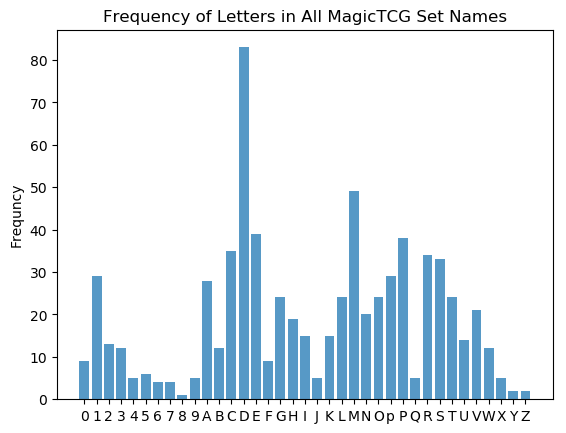

In [45]:
plt.bar(y_pos, frequency, align = 'center', alpha = 0.75)    # alpha determines how opaque the bars are in color
plt.xticks(y_pos, objects)
plt.ylabel('Frequncy')
plt.title('Frequency of Letters in All MagicTCG Set Names')
 
plt.show()

### Conclusion on All Set Names

For the most part the letter frequency is as I expected. Popular letters like "E" and "A" are quite common.

Although this tells me exactly nothing about the game it certainly is interesting to see that "D" is such a popular set letter name throughout all of magic's history - I didn't know that all the duel decks had "DD" in their set codes. I would have thought "M" would be the most popular considering the set names like "M11", "M12", "M13", etc. 

In [46]:
objects = expansionLetters.keys()         # the keys in the dictionary become the x axis - in lexicographic order
y_pos = np.arange(len(objects))
frequency = expansionLetters.values()           # the values in the dictionary become the y axis

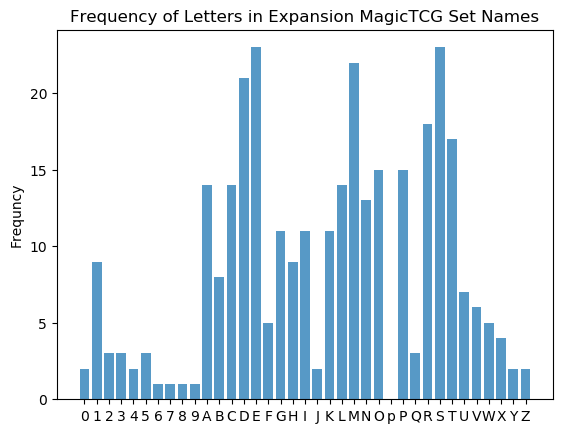

In [47]:
plt.bar(y_pos, frequency, align = 'center', alpha = 0.75)    # alpha determines how opaque the bars are in color
plt.xticks(y_pos, objects)
plt.ylabel('Frequncy')
plt.title('Frequency of Letters in Expansion MagicTCG Set Names')
 
plt.show()

### Conclusion on Expansion Set Names
Surprisingly, "D" is still one of the most frequent letters in the expansion sets despite removing all of the Duel Deck expansions. I knew that "1" would be the most popular letter just because most of these sets that use number take place in the 201X's. 